# Esonero

In [2]:
import cv2 # OpenCV-Python
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from scipy import ndimage
%matplotlib inline

print("OpenCV-Python Version %s" % cv2.__version__)

plt.rcParams['figure.figsize'] = (12, 8)

OpenCV-Python Version 4.5.1


## Quesito 1

disegnare qualcosa con testo con opencv


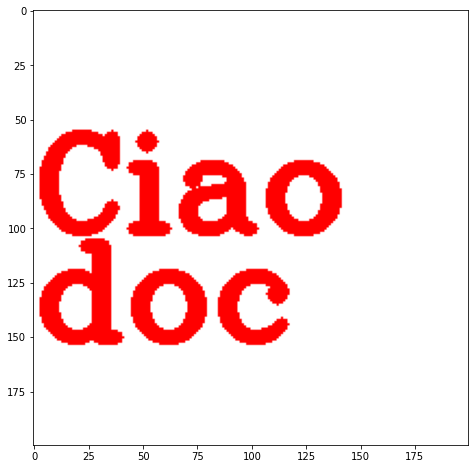

In [3]:
#np.full(shape, valore di riempimento, tipo che è facoltativo)

imm = np.full((200,200,3), 255, dtype=np.uint8 )  
#per immagine con sfondo nero mettere 0 al posto di 255

font = cv2.FONT_HERSHEY_COMPLEX

#testo --> immagine, cosa vuoi scrivere, posizione x,y, font, fontScale, rgb, spessore
cv2.putText(imm, 'Ciao', (0,100), font, 2, (255,0,0), 6)
cv2.putText(imm, 'doc', (0,150), font, 2, (255,0,0), 6)

#cv2.line immagine, punto iniziale, punto finale, rgb, spessore
#cv2.line(imm, (0,50), (175,50), (0,255,0), 2)


plt.imshow(imm)



## Quesito 2

Una volta ottenuta l'immagine estrarre il testo e inserirlo in un'altra immagine


shape img1 = (466, 700, 3)
shape img2 = (630, 630, 3)
shape img2 resized = (126, 126, 3)


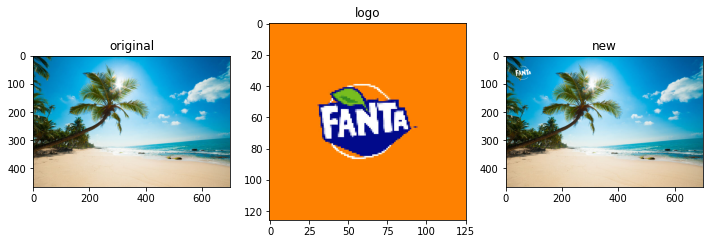

In [4]:
folder = 'imm'

def path(fname):
    filename = os.path.join(folder, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename


img1 = cv2.imread(path('spiaggia.jpg'), cv2.IMREAD_COLOR)
img2 = cv2.imread(path('logo.jpg'), cv2.IMREAD_COLOR)

print(f'shape img1 = {img1.shape}')
print(f'shape img2 = {img2.shape}')

# reduce logo size
#dimensione compatibile con la parte di immagine in cui si vuole inserire il logo
H, W, _ = img2.shape
H = int(H / 5)
W = int(W / 5)
img2 = cv2.resize(img2, (W, H))

rows, cols, _ = img2.shape
print(f'shape img2 resized = {img2.shape}')

# I want to put logo on top-left corner, So I create a ROI
#regione dove si vuole introdurre il logo 
roi = img1[0:rows, 0:cols]
#200:200+rows, 100:100+cols giocando in questo modo si sposta la scritta 

# Now create a mask of logo and create its inverse mask also
#si converte l'immagine in scala di grigi perchè è più semplice trattarla
#in modo tale da avere un solo canale quindi una matrice
#a due dimensioni in cui ogni valore
#rappresenta un valore tra 0 e 255. su questa immagine 
#a scala di grigi si applica una treshold 
#che binarizza l'immagine del logo in modo da distinguere bene
#ciò che è bianco (scritta) da ciò che è nero (sfondo)
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
ret, mask = cv2.threshold(img2gray, 230, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask) 

# Now black-out the area of logo in ROI
#si applica la maschera inversa perchè dall'imm 
#dell'auto si vogliono estrarre tutti
#i pixel nei quali non verrà inserito il logo. 
#Non verrà perchè non voglio che sparisca tuttp
#ma che rimanga la parete
#maschera per background
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image.
#maschera per selezionare i pixel del logo
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1edit = img1.copy()
img1edit[0:rows, 0:cols] = dst

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('logo')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img1edit, cv2.COLOR_BGR2RGB))
plt.title('new')
plt.show()

## Quesito 3
Dall'imagine del punto 2 estrarre con una maschera una porzione di immagine e illustrare gli istogrammi dell'immagine intera e della porzione

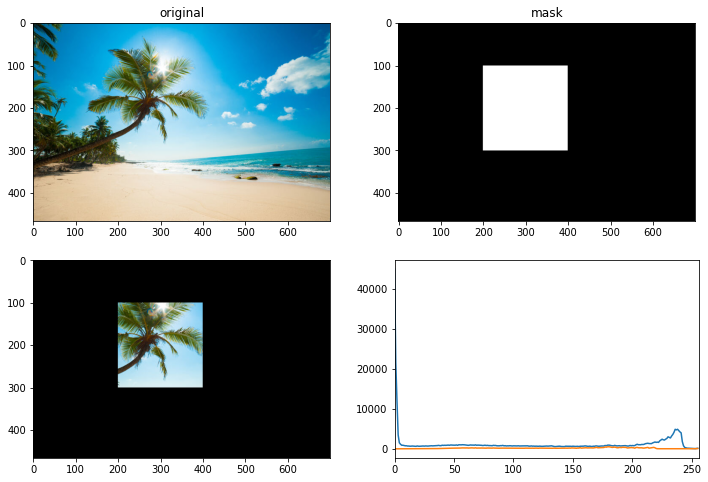

In [15]:
imm = cv2.imread(path('spiaggia.jpg'), cv2.IMREAD_COLOR)

#istogramma di una porzione di immagine
img3 = cv2.cvtColor(imm, cv2.COLOR_BGR2RGB)#conversione ai colori giusti
# create a mask
mask = np.zeros(img3.shape[:2], np.uint8)
mask[100:300, 200:400] = 255 #nelle parentesi quadre ci sono le coordinate della maschera
masked_img = cv2.bitwise_and(img3,img3,mask = mask) #immagine immagine maschera
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img3],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img3],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img3, 'gray'), plt.title('original')
plt.subplot(222), plt.imshow(mask,'gray'), plt.title('mask')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#l'istogramma dell'immagine completa è blu, del ritaglio è arancione



## Quesito 4

Sull'immagine del punto due applicare un filtro gaussiano e uno a piacere e illustrare i risultati


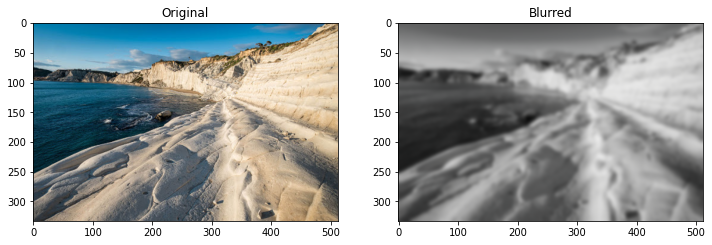

In [15]:
imm3 = cv2.imread(path('spiaggia2.jpg'), cv2.IMREAD_COLOR)

blur = ndimage.gaussian_filter(imm3, sigma=3)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imm3, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.show()





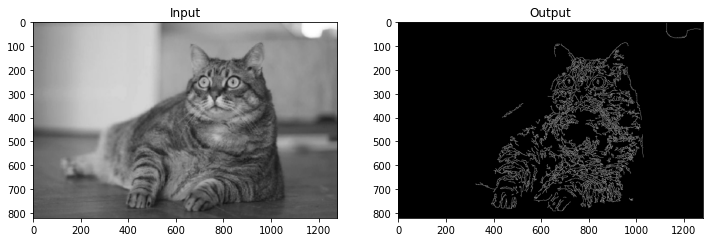

In [21]:
#esercizio in-out
from skimage.color import rgb2gray, gray2rgb
import skimage

cat_image = cv2.imread(path('gatto.jpg'), cv2.IMREAD_COLOR)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.title('Input')

image = skimage.img_as_ubyte(cat_image)

edges = cv2.Canny(image, 10, 100, None, 3)

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Output')
plt.show()


In [ ]:
ist calcolato canalti superiori al 50% o con contributi inferiori a

In [ ]:
#caricare l'immagine da skit-image e convertirla in scala di grigi

